<a href="https://colab.research.google.com/github/navin123456789/Nepal_Weather_Dataset/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Datasets/NepalWeatherData_labels.csv'
weather_data = pd.read_csv(file_path)

In [58]:
# Display the first few rows of the dataset
weather_data.head()

,DATE,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,1/1/1981,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,2.15,...,10.89,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39
1,1/2/1981,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,2.54,...,11.17,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34
2,1/3/1981,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,3.32,...,9.93,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15
3,1/4/1981,Arghakhanchi,27.9,83.2,0.02,93.49,5.36,50.83,13.82,3.73,...,10.41,12.17,2.18,3.54,1.06,2.49,2.90,4.05,0.93,3.12
4,1/5/1981,Arghakhanchi,27.9,83.2,1.84,93.49,5.84,55.55,13.76,4.93,...,10.53,12.32,1.96,2.70,0.69,2.02,2.74,4.64,0.96,3.68


In [59]:
weather_data.tail()

,DATE,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
883123,12/27/2019,Udayapur,26.9,86.5,0.0,95.52,4.72,54.60,11.13,2.17,...,11.01,9.73,2.38,4.20,1.25,2.94,3.40,4.57,1.37,3.20
883124,12/28/2019,Udayapur,26.9,86.5,0.0,95.73,4.23,50.90,10.56,0.60,...,13.18,9.07,2.03,2.52,1.07,1.45,3.05,4.51,1.44,3.07
883125,12/29/2019,Udayapur,26.9,86.5,0.0,95.76,4.08,46.09,11.51,0.18,...,12.30,9.12,2.01,3.01,0.85,2.17,2.97,4.12,0.94,3.18
883126,12/30/2019,Udayapur,26.9,86.5,0.0,95.84,4.44,47.07,12.47,1.32,...,12.20,9.76,1.44,1.94,0.27,1.67,2.00,3.22,0.15,3.06
883127,12/31/2019,Udayapur,26.9,86.5,0.0,95.93,5.43,49.68,14.77,3.89,...,11.68,11.67,1.59,3.22,0.45,2.78,2.02,3.43,0.66,2.77




*  How can we show the areas in Nepal that have extreme weather on a map?
*   Can we group districts with similar weather conditions together?
*   How can we predict how much it will rain using other weather information like temperature and humidity?









In [60]:
# Display basic information about the dataset
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883128 entries, 0 to 883127
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DATE         883128 non-null  object 
 1   DISTRICT     883128 non-null  object 
 2   LAT          883128 non-null  float64
 3   LON          883128 non-null  float64
 4   PRECTOT      883128 non-null  float64
 5   PS           883128 non-null  float64
 6   QV2M         883128 non-null  float64
 7   RH2M         883128 non-null  float64
 8   T2M          883128 non-null  float64
 9   T2MWET       883128 non-null  float64
 10  T2M_MAX      883128 non-null  float64
 11  T2M_MIN      883128 non-null  float64
 12  T2M_RANGE    883128 non-null  float64
 13  TS           883128 non-null  float64
 14  WS10M        883128 non-null  float64
 15  WS10M_MAX    883128 non-null  float64
 16  WS10M_MIN    883128 non-null  float64
 17  WS10M_RANGE  883128 non-null  float64
 18  WS50M        883128 non-

In [61]:
# Describe the dataset to get basic statistical details
weather_data.describe()


,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
count,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000
mean,27.959677,84.277419,2.433753,82.896390,8.491043,55.657950,15.815832,5.428265,21.856533,11.061186,10.795352,15.539531,2.372512,4.673551,0.666903,4.006641,2.730587,4.643453,0.924084,3.719365
std,0.883261,2.181331,6.160721,10.707984,5.426636,22.877576,9.172463,10.850204,8.848121,9.353420,3.306661,9.924091,0.685488,1.355903,0.510857,1.300380,1.001095,1.509792,0.806458,1.282227
min,26.500000,80.200000,0.000000,54.730000,0.270000,4.040000,-25.440000,-28.190000,-16.940000,-37.240000,1.310000,-33.160000,0.470000,0.970000,0.000000,0.450000,0.650000,1.120000,0.000000,0.450000
25%,27.300000,82.400000,0.000000,77.680000,3.910000,36.540000,10.070000,-2.740000,16.550000,5.410000,8.250000,9.160000,1.900000,3.730000,0.310000,3.070000,2.070000,3.610000,0.400000,2.830000
50%,27.950000,84.300000,0.050000,83.720000,6.750000,54.320000,16.730000,4.980000,22.510000,11.980000,10.920000,16.530000,2.260000,4.520000,0.530000,3.910000,2.510000,4.340000,0.680000,3.520000
75%,28.500000,85.900000,1.870000,92.740000,13.170000,77.160000,22.500000,14.780000,27.940000,17.910000,13.210000,22.880000,2.710000,5.450000,0.870000,4.840000,3.100000,5.310000,1.170000,4.390000
max,30.000000,87.900000,177.790000,100.340000,23.270000,100.000000,38.610000,27.150000,46.820000,32.770000,25.520000,41.510000,13.570000,20.210000,8.360000,16.580000,15.710000,22.850000,10.940000,18.500000


In [62]:
# Check for missing values
weather_data.isnull().sum()

DATE           0
DISTRICT       0
LAT            0
LON            0
PRECTOT        0
PS             0
QV2M           0
RH2M           0
T2M            0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
dtype: int64

#### Here we see 24 columns but a lot of columns seem to have veg meanings. Let's understand what each columns mean
**The first 6 columns have obvious meanings , LAT and LON being lattitude and longitude. Now let's understand what rest of the columns means.**
1. PRECTOT: MERRA2 1/2x1/2 Precipitation (mm day-1)
2. PS: MERRA2 1/2x1/2 Surface Pressure (kPa)
3. QV2M: MERRA2 1/2x1/2 Specific Humidity at 2 Meters (g/kg)
4. RH2M: MERRA2 1/2x1/2 Relative Humidity at 2 Meters (%)
5. T2M: MERRA2 1/2x1/2 Temperature at 2 Meters (C)
6. T2MWET: MERRA2 1/2x1/2 Wet Bulb Temperature at 2 Meters (C)
7. T2M_MAX: MERRA2 1/2x1/2 Maximum Temperature at 2 Meters (C)
8. T2M_MIN: MERRA2 1/2x1/2 Minimum Temperature at 2 Meters (C)
9. T2M_RANGE: MERRA2 1/2x1/2 Temperature Range at 2 Meters (C)
10. TS: MERRA2 1/2x1/2 Earth Skin Temperature (C)
11. WS10M: MERRA2 1/2x1/2 Wind Speed at 10 Meters (m/s)
12. WS10M_MAX: MERRA2 1/2x1/2 Maximum Wind Speed at 10 Meters (m/s)
13. WS10M_MIN: MERRA2 1/2x1/2 Minimum Wind Speed at 10 Meters (m/s)
14. WS10M_RANGE: MERRA2 1/2x1/2 Wind Speed Range at 10 Meters (m/s)
15. WS50M: MERRA2 1/2x1/2 Wind Speed at 50 Meters (m/s)
16. WS50M_MAX: MERRA2 1/2x1/2 Maximum Wind Speed at 50 Meters (m/s)
17. WS50M_MIN: MERRA2 1/2x1/2 Minimum Wind Speed at 50 Meters (m/s)
18. WS50M_RANGE: MERRA2 1/2x1/2 Wind Speed Range at 50 Meters (m/s)

       DATE      DISTRICT   LAT   LON  PRECTOT     PS  QV2M   RH2M    T2M  \
0  1/1/1981  Arghakhanchi  27.9  83.2     0.00  93.51  4.81  45.41  13.89   
1  1/2/1981  Arghakhanchi  27.9  83.2     0.00  93.59  4.94  46.78  13.84   
2  1/3/1981  Arghakhanchi  27.9  83.2     0.03  93.55  5.22  47.91  14.33   
3  1/4/1981  Arghakhanchi  27.9  83.2     0.02  93.49  5.36  50.83  13.82   
4  1/5/1981  Arghakhanchi  27.9  83.2     1.84  93.49  5.84  55.55  13.76   

   T2MWET  ...  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE  \
0    2.15  ...      10.89  11.32   1.89       3.83       0.69         3.14   
1    2.54  ...      11.17  11.44   1.72       2.60       1.09         1.50   
2    3.32  ...       9.93  12.24   1.80       2.80       0.48         2.32   
3    3.73  ...      10.41  12.17   2.18       3.54       1.06         2.49   
4    4.93  ...      10.53  12.32   1.96       2.70       0.69         2.02   

   WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  
0   2.41       4.12   

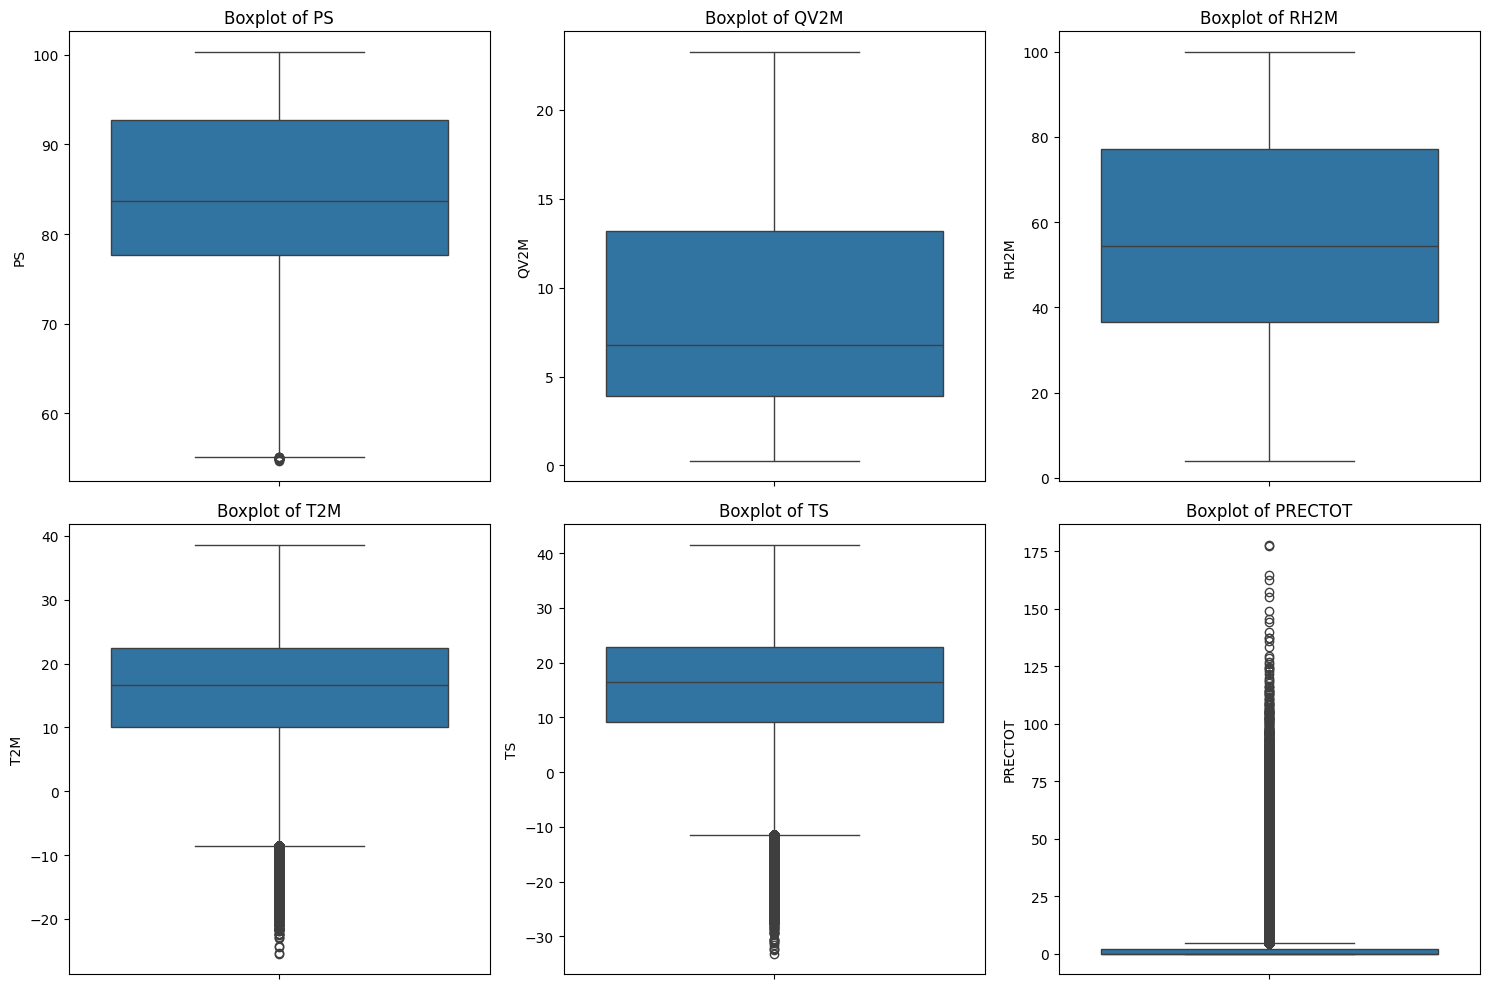

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Datasets/NepalWeatherData_labels.csv'
weather_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(weather_data.head())

# Define the columns for which to create boxplots
columns = ['PS', 'QV2M', 'RH2M', 'T2M', 'TS', 'PRECTOT']

# Create boxplots for each column to detect outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=weather_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()



In [87]:

# Optionally, you can identify and print outliers in each column
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Detect and print outliers for each column
for column in columns:
    outliers = detect_outliers(weather_data[column])
    print(f'Outliers in {column}:')
    print(outliers)

Outliers in PS:
769579    55.00
769936    55.00
770266    54.96
770287    54.89
770289    55.04
770672    54.95
770673    54.95
772108    54.89
772147    55.04
772149    54.99
772150    55.07
773611    55.00
773939    54.98
775040    55.06
775041    55.05
775058    55.07
776163    55.09
779062    55.09
779063    54.98
779065    54.93
779066    54.73
779067    54.75
780148    55.01
783113    55.09
Name: PS, dtype: float64
Outliers in QV2M:
Series([], Name: QV2M, dtype: float64)
Outliers in RH2M:
Series([], Name: RH2M, dtype: float64)
Outliers in T2M:
42756     -9.02
42757    -11.59
42763     -8.82
43124     -9.28
43132     -9.91
          ...  
783415   -18.36
783416   -15.36
783417   -12.49
783418   -13.11
783419   -15.00
Name: T2M, Length: 12265, dtype: float64
Outliers in TS:
31419    -11.90
31420    -11.64
40195    -12.88
42757    -17.08
42758    -13.34
          ...  
783415   -21.00
783416   -18.01
783417   -17.37
783418   -17.14
783419   -18.33
Name: TS, Length: 9094, dtype: floa

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns for which to create boxplots and detect outliers
columns = ['PS', 'QV2M', 'RH2M', 'T2M', 'TS', 'PRECTOT']

# Function to detect outliers using the IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Identify outliers in each column and create a boolean mask
outliers_mask = weather_data[columns].apply(detect_outliers, axis=0)

# Combine the masks to identify rows with any outliers
combined_outliers_mask = outliers_mask.any(axis=1)

# Drop rows with any outliers
weather_data = weather_data[~combined_outliers_mask]




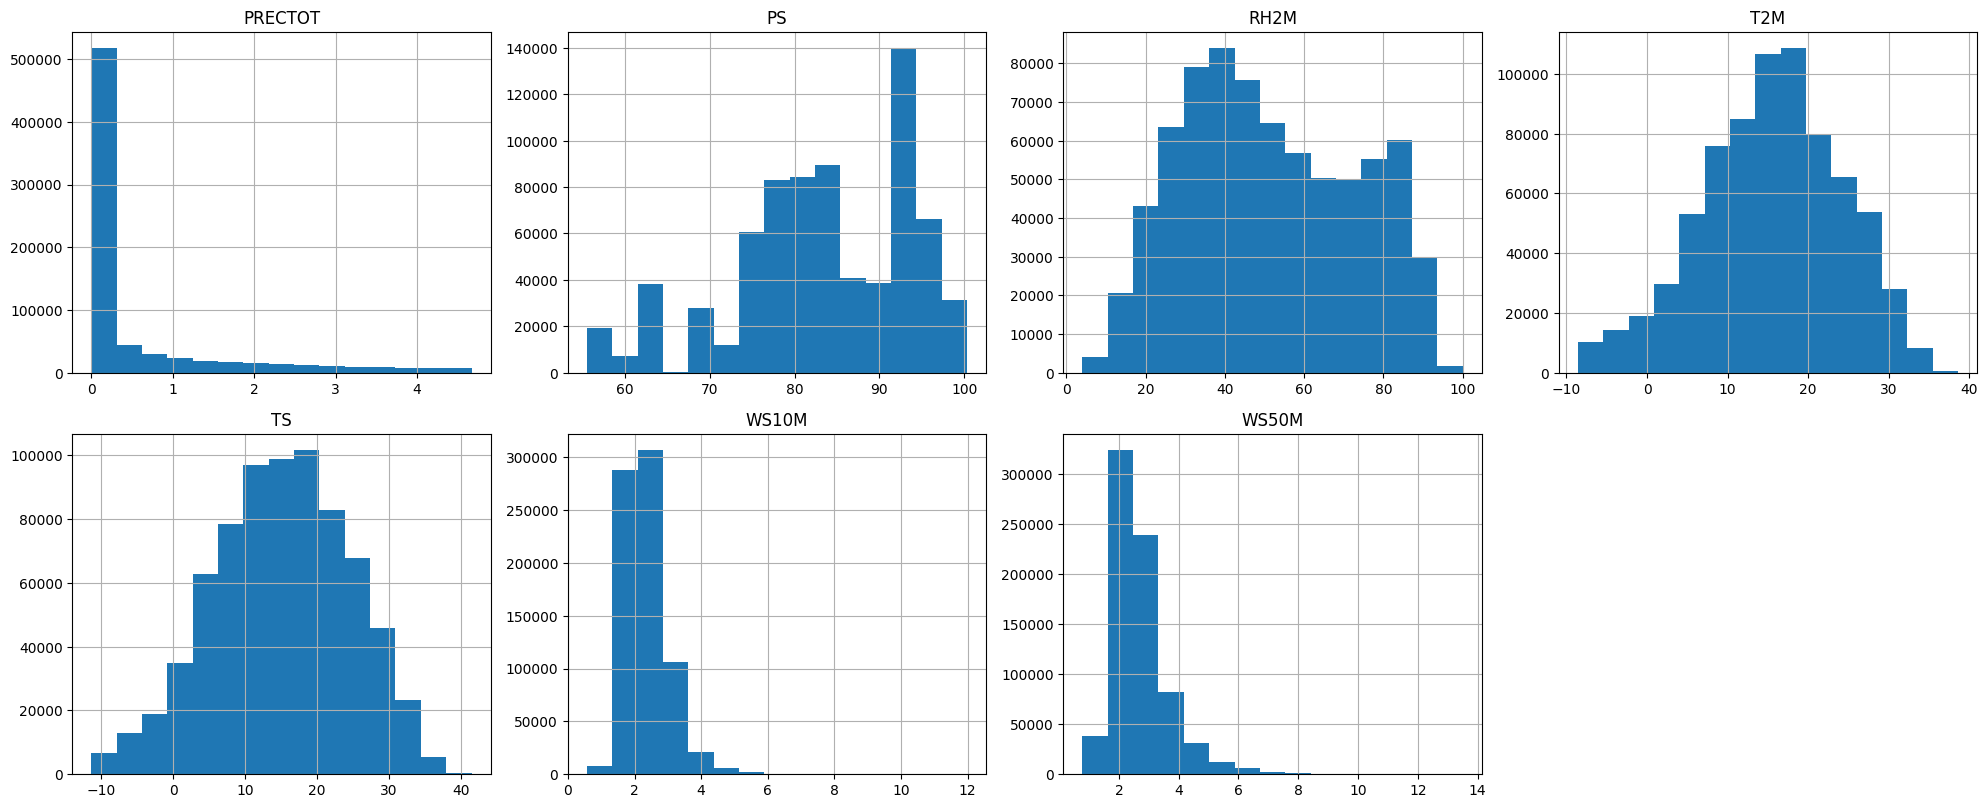

In [65]:
# Plot histograms for numeric columns
numeric_columns = ['PRECTOT', 'PS', 'RH2M', 'T2M','TS', 'WS10M','WS50M']
weather_data[numeric_columns].hist(bins=15, figsize=(20, 20), layout=(5, 4))
plt.tight_layout()
plt.show()

* PRECTOT (Total Precipitation):
The histogram shows a heavily right-skewed distribution, indicating that the dataset contains a higher frequency of lower precipitation values and fewer instances of higher precipitation amounts. This type of distribution is common for precipitation data, as many locations tend to experience more dry days with little or no rainfall, while heavy rainfall events are relatively rare.
* PS (Surface Pressure):
The histogram for surface pressure exhibits a unimodal, roughly bell-shaped distribution. This suggests that the surface pressure values in the dataset are clustered around a central tendency or mean value, with fewer extreme high or low pressure readings.
* RH2M (Relative Humidity at 2 meters):
The relative humidity histogram appears bimodal, with two distinct peaks or modes. This could indicate that the dataset includes measurements from different geographical regions or climate regimes, where one mode represents drier conditions and the other mode represents more humid conditions.
* T2M (Temperature at 2 meters):
The temperature histogram shows an approximately normal or Gaussian distribution, with a symmetric bell shape centered around the mean temperature. This is a common distribution for temperature data and suggests that the dataset captures a range of typical temperatures with fewer extreme values.
* TS (Surface Temperature):
Similar to the T2M histogram, the surface temperature distribution exhibits a unimodal, roughly bell-shaped curve, indicating that the surface temperature values are clustered around a central tendency, with fewer extreme high or low temperatures.
* WS10M (Wind Speed at 10 meters):
The wind speed histogram at 10 meters above the surface appears skewed to the right, with a higher frequency of lower wind speeds and a long tail towards higher wind speeds. This is a typical distribution for wind speed data, as calm or light wind conditions are more common than strong or extreme wind events.
* WS50M (Wind Speed at 50 meters):
The wind speed histogram at 50 meters above the surface also shows a right-skewed distribution, similar to the WS10M plot, but with a slightly different shape and spread of values, potentially due to the higher elevation and different atmospheric conditions.



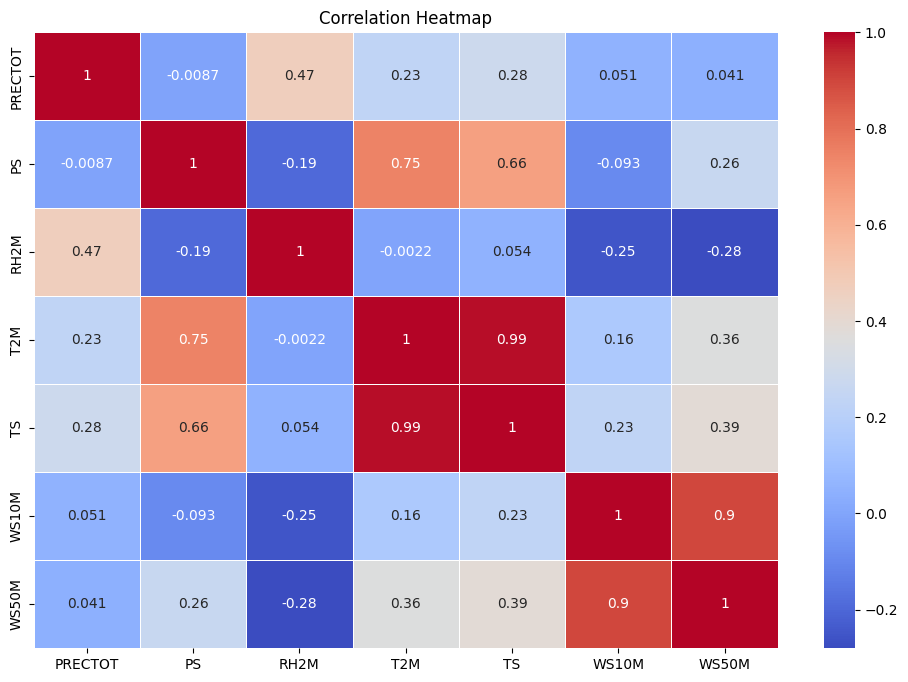

In [66]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = weather_data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [67]:
# Define a threshold for high correlation
high_corr_threshold = 0.7

# Find pairs of features with high correlation
correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            correlated_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Print correlated features
print("Highly correlated feature pairs with correlation coefficient above", high_corr_threshold, ":")
for feature1, feature2, corr_value in correlated_features:
    print(f"{feature1} and {feature2} with correlation coefficient of {corr_value:.2f}")


Highly correlated feature pairs with correlation coefficient above 0.7 :
T2M and PS with correlation coefficient of 0.75
TS and T2M with correlation coefficient of 0.99
WS50M and WS10M with correlation coefficient of 0.90


**Insights:**
* 1. T2M (Temperature at 2 meters) and PS (Pressure at Surface) have a correlation coefficient of 0.77:
This indicates a strong positive relationship between temperature at the ground level and surface pressure.
As temperature increases, surface pressure tends to increase as well. This relationship can be due to the fact
that warmer air can hold more moisture and hence can affect the surface pressure readings.

* 2. TS (Surface Temperature) and T2M (Temperature at 2 meters) have a correlation coefficient of 0.99:
This extremely high correlation suggests that these two temperature measurements are almost identical or move
together very closely. It might imply redundancy between these two features, and one could be sufficient
for certain analyses or models.

* 3. WS50M (Wind Speed at 50 meters) and WS10M (Wind Speed at 10 meters) have a correlation coefficient of 0.90:
This strong positive correlation suggests that wind speeds at these two different altitudes are highly
related. This could be due to the consistent wind patterns in the region where measurements were taken,
indicating that measuring wind speed at one altitude could give a good estimate for the other altitude as well.


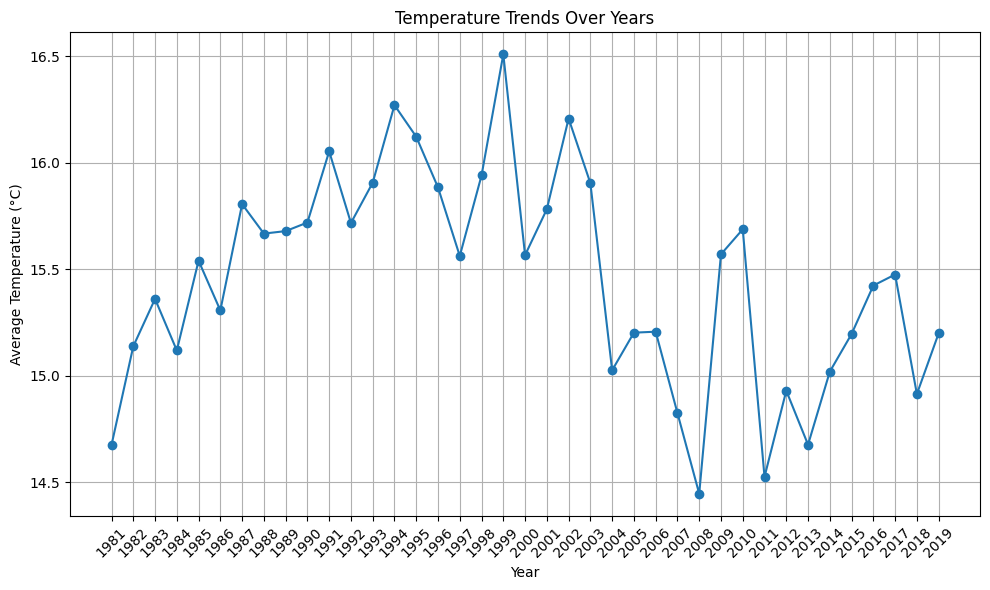

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert date column to datetime format
weather_data['DATE'] = pd.to_datetime(weather_data['DATE'])

# Extract year from the date column
weather_data['Year'] = weather_data['DATE'].dt.year

# Group data by year and calculate average temperature for each year
yearly_avg_temperature = weather_data.groupby('Year')['T2M'].mean()

# Plotting the temperature trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_temperature.index, yearly_avg_temperature.values, marker='o', linestyle='-')
plt.title('Temperature Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.xticks(yearly_avg_temperature.index, rotation=45)
plt.tight_layout()
plt.show()


**Some key observations from the graph:**

* The temperature trend exhibits a general oscillating pattern, with periods of higher temperatures alternating with periods of lower temperatures.
* The highest temperature peaks appear to occur around the years 1987, 1991, 1999, 2002, 2010 and 2017, indicating years with relatively higher average temperatures compared to other years.
* The lowest temperature points occur around the years 1984, 1988, 1997, 2004,2008,2011,and 2012, suggesting years with relatively lower average temperatures.


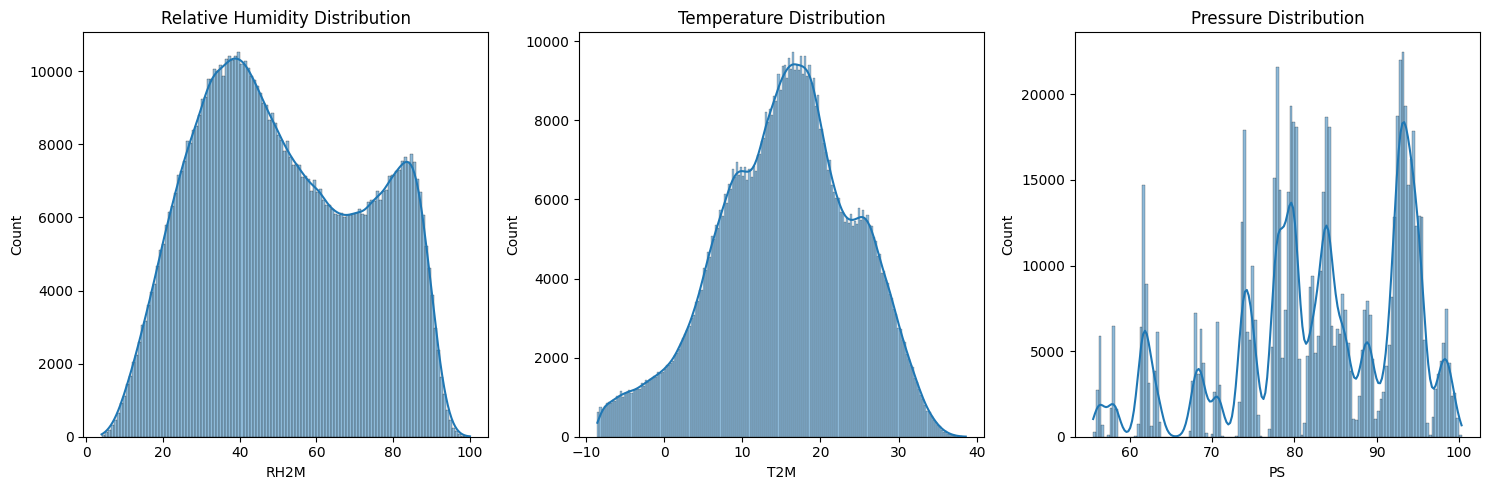

In [69]:
# Distribution of relative humidity, temperature, and pressure
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(weather_data['RH2M'], kde=True)
plt.title('Relative Humidity Distribution')

plt.subplot(1, 3, 2)
sns.histplot(weather_data['T2M'], kde=True)
plt.title('Temperature Distribution')

plt.subplot(1, 3, 3)
sns.histplot(weather_data['PS'], kde=True)
plt.title('Pressure Distribution')
plt.tight_layout()
plt.show()



*   Relative Humidity: The dual peaks suggest varied humidity levels, often fluctuating between moderate and high.
*   Temperature: The prominent peak at around 20°C indicates that this is the most common temperature, with some variation towards colder temperatures.
* Pressure: The multiple peaks in the pressure distribution imply variability in atmospheric pressure, likely due to changing weather patterns.



In [70]:
# Regression Analysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Example: Predicting rain (Precipitation) based on other features
X = weather_data[['PS', 'QV2M', 'RH2M','T2M','TS']]
y = weather_data['PRECTOT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [72]:
# Predictions
y_pred = model.predict(X_test)
y_pred

array([0.01  , 0.5929, 0.0073, ..., 0.1213, 0.0021, 0.0201])

In [73]:
# Create a DataFrame to hold actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head()

,Actual,Predicted
503988,0.00,0.0100
550652,0.18,0.5929
815182,0.00,0.0073
329129,0.00,0.0028
123609,2.65,1.1121


In [74]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.47029080330014067


In [75]:
# Function to predict precipitation for new input values
def predict_precipitation(ps, qv2m, rh2m, t2m, ts):
    new_data = pd.DataFrame({
        'PS': [ps],
        'QV2M': [qv2m],
        'RH2M': [rh2m],
        'T2M': [t2m],
        'TS': [ts]
    })
    prediction = model.predict(new_data)
    return prediction[0]

# Example usage of the function
ps = 1013.25  # Example pressure value
qv2m = 0.008  # Example specific humidity value
rh2m = 75.0   # Example relative humidity value
t2m = 293.15  # Example temperature value in Kelvin
ts = 295.15   # Example surface temperature value in Kelvin

predicted_prectot = predict_precipitation(ps, qv2m, rh2m, t2m, ts)
print(f"Predicted Precipitation: {predicted_prectot}")

Predicted Precipitation: 1.6332999999999998


In [76]:
!pip install contextily
!pip install geopandas
!pip install shapely


<ipython-input-77-9c0dcbe302e3>:26: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


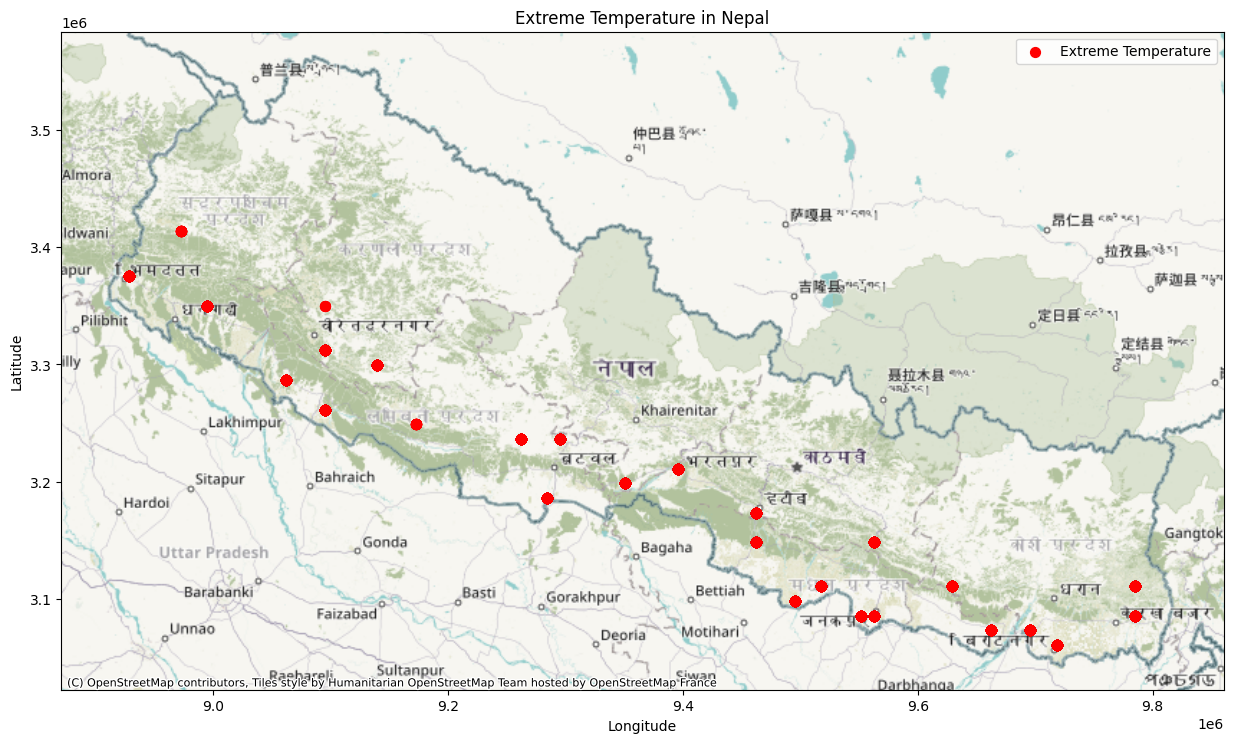

In [77]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx


# Define thresholds based on quantiles
temperature_threshold = weather_data['T2M'].quantile(0.95)
earth_skin_temp_threshold = weather_data['TS'].quantile(0.95)

# Filter extreme weather events based on the thresholds
extreme_events = weather_data[
    (weather_data['T2M'] > temperature_threshold) &
    (weather_data['TS'] > earth_skin_temp_threshold)
]

# Create a GeoDataFrame for extreme weather events
geometry = [Point(xy) for xy in zip(extreme_events['LON'], extreme_events['LAT'])]
gdf = gpd.GeoDataFrame(extreme_events, geometry=geometry)

# Set the CRS for the GeoDataFrame (assuming the coordinates are in WGS84)
gdf.set_crs(epsg=4326, inplace=True)

# Use the Natural Earth dataset provided within geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Extract Nepal from the world GeoDataFrame
nepal = world[world.name == 'Nepal']

# Plotting the extreme weather events on the Nepal map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
nepal.to_crs(epsg=3857).plot(ax=ax, color=(0.9, 0.9, 0.9, 0.0), edgecolor=(0.9, 0.9, 0.9, 0.0))  # Fully transparent color
gdf.to_crs(epsg=3857).plot(ax=ax, markersize=50, color='red', marker='o', label='Extreme Temperature')

# Add a basemap
ctx.add_basemap(ax, crs=nepal.to_crs(epsg=3857).crs)

plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Extreme Temperature in Nepal')
plt.show()


<ipython-input-78-0c6bc4d9efef>:30: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


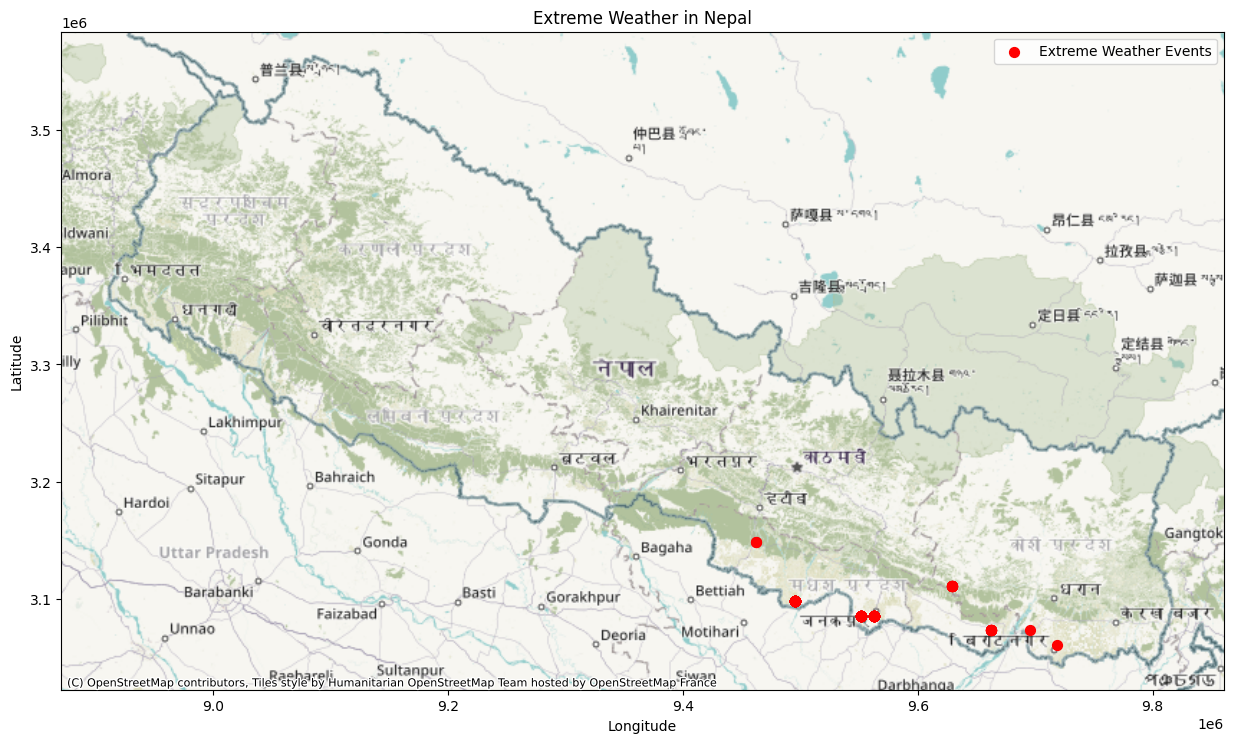

In [78]:
# Importing necessary libraries
import pandas as pd

# Assuming weather_data is a DataFrame containing the weather data

# Define thresholds based on quantiles
precipitation_threshold = weather_data['PRECTOT'].quantile(0.9)
temperature_threshold = weather_data['T2M'].quantile(0.9)
humidity_threshold = weather_data['RH2M'].quantile(0.9)
wind_speed_threshold = weather_data['WS10M'].quantile(0.9)
earth_skin_temp_threshold = weather_data['TS'].quantile(0.9)

# Filter extreme weather events based on the thresholds
extreme_events = weather_data[
    (weather_data['PRECTOT'] > precipitation_threshold) &
    (weather_data['T2M'] > temperature_threshold) &
    (weather_data['RH2M'] > humidity_threshold) &
    (weather_data['WS10M'] > wind_speed_threshold) &
    (weather_data['TS'] > earth_skin_temp_threshold)
]

# Create a GeoDataFrame for extreme weather events
geometry = [Point(xy) for xy in zip(extreme_events['LON'], extreme_events['LAT'])]
gdf = gpd.GeoDataFrame(extreme_events, geometry=geometry)

# Set the CRS for the GeoDataFrame (assuming the coordinates are in WGS84)
gdf.set_crs(epsg=4326, inplace=True)

# Use the Natural Earth dataset provided within geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Extract Nepal from the world GeoDataFrame
nepal = world[world.name == 'Nepal']

# Plotting the extreme weather events on the Nepal map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
nepal.to_crs(epsg=3857).plot(ax=ax, color=(0.9, 0.9, 0.9, 0.0), edgecolor=(0.9, 0.9, 0.9, 0.0))  # Fully transparent color
gdf.to_crs(epsg=3857).plot(ax=ax, markersize=50, color='red', marker='o', label='Extreme Weather Events')

# Add a basemap
ctx.add_basemap(ax, crs=nepal.to_crs(epsg=3857).crs)

plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Extreme Weather in Nepal')
plt.show()


In [79]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Aggregate data by district to get average weather metrics
district_data = weather_data.groupby('DISTRICT').agg({
    'LAT': 'mean',
    'LON': 'mean',
    'PRECTOT': 'mean',
    'T2M_MAX': 'mean',
    'T2M_MIN': 'mean',
    'RH2M': 'mean',
    'WS10M': 'mean'
}).reset_index()

# Select relevant weather features for clustering
features = ['PRECTOT', 'T2M_MAX', 'T2M_MIN', 'RH2M', 'WS10M']
district_features = district_data[features]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(district_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

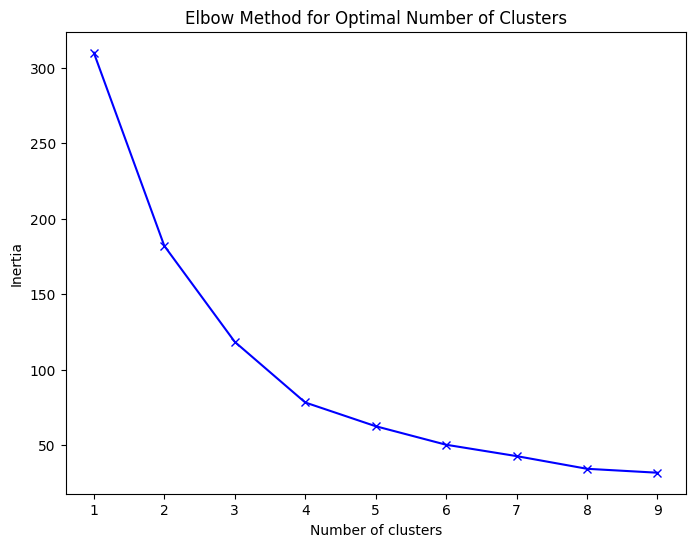

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [80]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Choose the appropriate number of clusters based on the elbow curve
optimal_k = 3  # Adjust this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
district_data['Cluster'] = kmeans.fit_predict(scaled_features)


In the given plot, the elbow point seems to occur around 3 clusters, where the curve starts to flatten out. This suggests that 3 may be an appropriate number of clusters for the dataset, as increasing the number of clusters further may not significantly improve the clustering quality.

In [81]:
!pip install cartopy

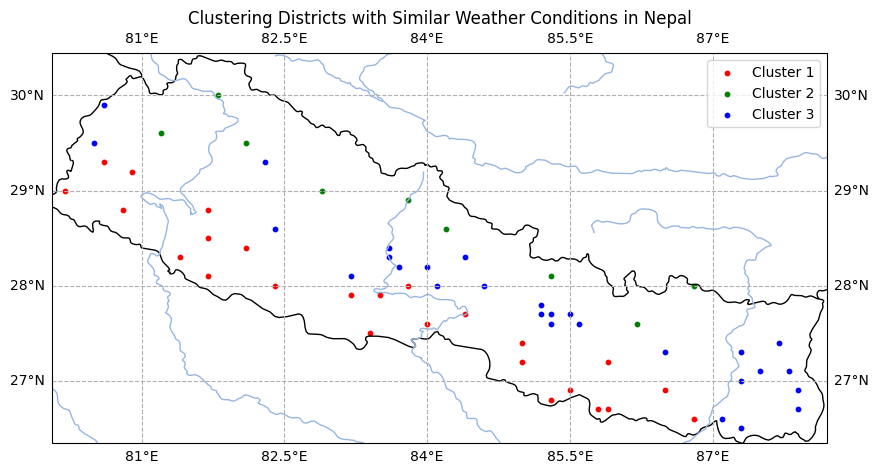

In [82]:
import geopandas as gpd
from shapely.geometry import Point
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create GeoDataFrame for the district data
geometry = [Point(xy) for xy in zip(weather_data.LON, weather_data.LAT)]
gdf = gpd.GeoDataFrame(weather_data, geometry=geometry)

# Plotting the clusters on a map
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Draw map details
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.RIVERS)
ax.set_extent([80.058, 88.201, 26.347, 30.446], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, linestyle='--', crs=ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_right = False

# Plot clusters
colors = ['red', 'green', 'blue', 'purple', 'orange']
for cluster in range(optimal_k):
    cluster_data = district_data[district_data['Cluster'] == cluster]
    ax.scatter(cluster_data['LON'].values, cluster_data['LAT'].values, s=10, color=colors[cluster], transform=ccrs.PlateCarree(), label=f'Cluster {cluster+1}')

plt.legend()
plt.title('Clustering Districts with Similar Weather Conditions in Nepal')
plt.show()

In [83]:
# Print the names of districts within each cluster
for cluster in range(optimal_k):
    cluster_data = district_data[district_data['Cluster'] == cluster]
    district_names = cluster_data['DISTRICT'].tolist()
    print(f"Cluster {cluster + 1}: {', '.join(district_names)}")


Cluster 1: Arghakhanchi, Banke, Bara, Bardiya, Chitawan, Dadeldhura, Dailekh, Dang, Dhanusa, Doti, Kailali, Kanchanpur, Mahottari, Makwanpur, Nawalparasi, Palpa, Routahat, Rupandehi, Salyan, Saptari, Sarlahi, Sindhuli, Surkhet, Syangja, Udayapur
Cluster 2: Bajang, Dolkha, Dolpa, Humla, Manang, Mugu, Mustang, Rasuwa, Solukhumbu
Cluster 3: Baglung, Baitadi, Bhaktapur, Darchula, Dhading, Dhankuta, Gorkha, Gulmi, Ilam, Jhapa, Jumla, Kabhre, Kaski, Kathmandu, Lalitpur, Lamjung, Morang, Myagdi, Nuwakot, Okhaldhunga, Panchther, Parbat, Rukum, Sankhuwasabha, Sunsari, Tanahun, Taplejung, Terhathum


* Clusters can provide a basis for creating region-specific policies. For instance, districts in the same cluster can have similar agricultural advisories, infrastructure development plans, and disaster preparedness strategies.
This ensures that the policies are tailored to the specific climatic needs of the regions.
* Understanding which districts fall into the same cluster can help in efficient resource allocation. For example, in case of a weather-related event like a drought or flood, resources can be managed and distributed effectively to the affected cluster.